In [4]:
import pandas as pd 

In [88]:
cvd=pd.read_csv(r'C:\Users\Anjaney Deshpande\Desktop\hjghjghjghjghjghjhjghj\CVD.csv')
cvd.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [89]:
cvd=cvd.drop(['Height_(cm)','Weight_(kg)'],axis=1)

In [90]:
cvd=cvd.drop(['Checkup','Exercise','Skin_Cancer',
       'Other_Cancer', 'Depression','Sex',
       'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],axis=1)

In [40]:

cvd=cvd.drop(cvd[(cvd['Alcohol_Consumption'] <0) | (cvd['Alcohol_Consumption'] >30)].index)
cvd=cvd.drop(cvd[(cvd['Fruit_Consumption'] <0) | (cvd['Alcohol_Consumption'] >120)].index)
cvd=cvd.drop(cvd[(cvd['Green_Vegetables_Consumption'] <0) | (cvd['Green_Vegetables_Consumption'] >128)].index)
cvd=cvd.drop(cvd[(cvd['FriedPotato_Consumption'] <0) | (cvd['FriedPotato_Consumption'] >128)].index)





In [86]:
cvd.isnull().sum()[cvd.isnull().sum()>0]

Series([], dtype: int64)

In [91]:
# cvd.Sex.replace({'Female':0,'Male':1},inplace=True)
cvd.General_Health.replace({'Poor':5,'Very Good':2,'Good':3,'Fair':4,'Excellent':1},inplace=True)
# cvd['Checkup'].replace({'Within the past 2 years': 0,'Within the past year': 1,
#                             '5 or more years ago': 2,'Within the past 5 years': 3, 'Never': 4}, inplace=True)
# cvd.Exercise.replace({'No':0,'Yes':1},inplace=True)
# cvd.Heart_Disease.replace({'No':0,'Yes':1},inplace=True)
# cvd['Skin_Cancer'].replace({'No':0,'Yes':1},inplace=True)
# cvd.Other_Cancer.replace({'No':0,'Yes':1},inplace=True)
# cvd.Depression.replace({'No':0,'Yes':1},inplace=True)
cvd['Diabetes'].replace({'No': 0,'Yes': 1,
    'No, pre-diabetes or borderline diabetes': 2,'Yes, but female told only during pregnancy': 3}, inplace=True)
cvd['Age_Category'].replace({
   '70-74': 0,'60-64': 1,'75-79': 2,'80+': 3,
         '65-69': 4,'50-54': 5, '45-49': 6,'18-24': 7,'30-34': 8, 
    '55-59': 9,'35-39': 10,'40-44': 11,'25-29': 12}, inplace=True)
cvd.Arthritis.replace({'Yes':1,'No':0},inplace=True)
# cvd.Smoking_History.replace({'Yes':1,'No':0},inplace=True)

In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [93]:
cvd[cvd.select_dtypes(include='object').columns]=cvd[cvd.select_dtypes(include='object').columns].apply(le.fit_transform)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
cvd_train,cvd_test=train_test_split(cvd,test_size=0.2)

In [ ]:
# df4 = cvd_train[cvd_train['Heart_Disease'] ==1]
# cvd_train = pd.concat([cvd_train] + [df4] *11, ignore_index=True)

In [96]:
cvd_train_x = cvd_train.drop(columns=['Heart_Disease'],axis=1)
cvd_train_y = cvd_train['Heart_Disease']
cvd_test_x = cvd_test.drop(columns=['Heart_Disease'],axis=1)
cvd_test_y = cvd_test['Heart_Disease']

In [14]:
#before oversampling
cvd_train_y.value_counts()

Heart_Disease
0    227078
1     20005
Name: count, dtype: int64

In [97]:
from imblearn.over_sampling import SMOTE    
smote = SMOTE(sampling_strategy='auto', random_state=42)
cvd_train_x_resampled, cvd_train_y_resampled = smote.fit_resample(cvd_train_x, cvd_train_y)

In [16]:
# AFTER OVERSAMPLING
cvd_train_y_resampled.value_counts()

Heart_Disease
0    227078
1    227078
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import timeit

rfc = RandomForestClassifier(criterion='gini',n_estimators=99,min_samples_split=67,max_depth=8)

start=timeit.default_timer()

scores = cross_val_score(rfc,cvd_train_x_resampled,cvd_train_y_resampled,cv=10)

stop=timeit.default_timer()

print("Accuracy scores for each fold:", scores)

exc=(stop - start)/60

print("Mean accuracy:", scores.mean())
print(f"execution time was ---->>> {exc} minutes")

Accuracy scores for each fold: [0.74874494 0.74903118 0.74856879 0.74949357 0.74991193 0.74632288
 0.74739623 0.7497743  0.75010459 0.75342948]
Mean accuracy: 0.7492777891153184
execution time was ---->>> 2.5161358549999933 minutes


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import timeit

rfc = RandomForestClassifier(criterion='gini',n_estimators=99,min_samples_split=67,max_depth=8)

start=timeit.default_timer()

scores = cross_val_score(rfc,cvd_train_x_resampled,cvd_train_y_resampled,cv=5)

stop=timeit.default_timer()

print("Accuracy scores for each fold:", scores)

exc=(stop - start)/60

print("Mean accuracy:", scores.mean())
print(f"execution time was ---->>> {exc} minutes")

Accuracy scores for each fold: [0.74900916 0.74902842 0.74778435 0.74846693 0.75104315]
Mean accuracy: 0.7490664002176354
execution time was ---->>> 0.8522958999999901 minutes


In [21]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# import timeit
# search_dict = {
#     'n_estimators': randint(50, 150),
#     'criterion': ['gini','entropy'],
#     'max_depth': randint(4, 9),
#     'min_samples_split': randint(50, 100)
# }
# start = timeit.default_timer()
# rfc = RandomForestClassifier()
# random_search = RandomizedSearchCV(rfc, param_distributions=search_dict, n_iter=10, cv=5)
# random_search.fit(cvd_train_x_resampled,cvd_train_y_resampled)
# stop = timeit.default_timer()
# print("Best Hyperparameters:",random_search.best_params_)
# exc_time = (stop - start)//60
# print(f"Execution Time: is --->>>{exc_time} minutes")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 67, 'n_estimators': 99}
Execution Time: is --->>>14.0 minutes


In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini',n_estimators=99,min_samples_split=67,max_depth=8)

In [100]:
rfc.fit(cvd_train_x_resampled,cvd_train_y_resampled)

RandomForestClassifier(max_depth=8, min_samples_split=67, n_estimators=99)

In [101]:
pred_rfc=rfc.predict(cvd_test_x)

In [102]:
from  sklearn.metrics import confusion_matrix

In [103]:
a=confusion_matrix(cvd_test_y,pred_rfc)
a

array([[39380, 17380],
       [ 1006,  4005]], dtype=int64)

In [73]:
[[39454, 17393],
       [  983,  3941]]

0.702935034239368

In [104]:
from sklearn.metrics import classification_report

print(classification_report(cvd_test_y,pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     56760
           1       0.19      0.80      0.30      5011

    accuracy                           0.70     61771
   macro avg       0.58      0.75      0.56     61771
weighted avg       0.91      0.70      0.77     61771



In [103]:
data = {
    "Class": ["0", "1", "accuracy==-->>70%", "macro avg", "weighted avg"],
    "Precision": [0.98, 0.18, "", 0.58, 0.91],
    "Recall": [0.69, 0.80, "", 0.75, 0.70],
    "F1-score": [0.81, 0.30, "", 0.56, 0.77],
    "Support": [56847, 4924, 61771, 61771, 61771]
}
data1=pd.DataFrame(data)
data1

,Class,Precision,Recall,F1-score,Support
0,0,0.98,0.69,0.81,56847
1,1,0.18,0.8,0.3,4924
2,accuracy==-->>70%,,,,61771
3,macro avg,0.58,0.75,0.56,61771
4,weighted avg,0.91,0.7,0.77,61771


In [111]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=88)

In [112]:
dtc.fit(cvd_train_x_resampled,cvd_train_y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=88)

In [113]:
dtc_pred=dtc.predict(cvd_test_x)

In [114]:
confusion_matrix(cvd_test_y,dtc_pred)

array([[39265, 17495],
       [  990,  4021]], dtype=int64)

In [115]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [116]:
nb.fit(cvd_train_x_resampled,cvd_train_y_resampled)

GaussianNB()

In [117]:
pred_nb=nb.predict(cvd_test_x)

In [118]:
confusion_matrix(cvd_test_y,pred_nb)

array([[39688, 17072],
       [ 1442,  3569]], dtype=int64)

In [105]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()


In [106]:
log.fit(cvd_train_x_resampled,cvd_train_y_resampled)

LogisticRegression()

In [107]:
pred_log=log.predict(cvd_test_x)

In [108]:
from sklearn.metrics import confusion_matrix,precision_score,f1_score
c=confusion_matrix(cvd_test_y,pred_log)
c

array([[39966, 16794],
       [ 1346,  3665]], dtype=int64)

In [109]:
from sklearn.metrics import classification_report

print(classification_report(cvd_test_y,pred_log))

              precision    recall  f1-score   support

           0       0.97      0.70      0.82     56760
           1       0.18      0.73      0.29      5011

    accuracy                           0.71     61771
   macro avg       0.57      0.72      0.55     61771
weighted avg       0.90      0.71      0.77     61771



In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

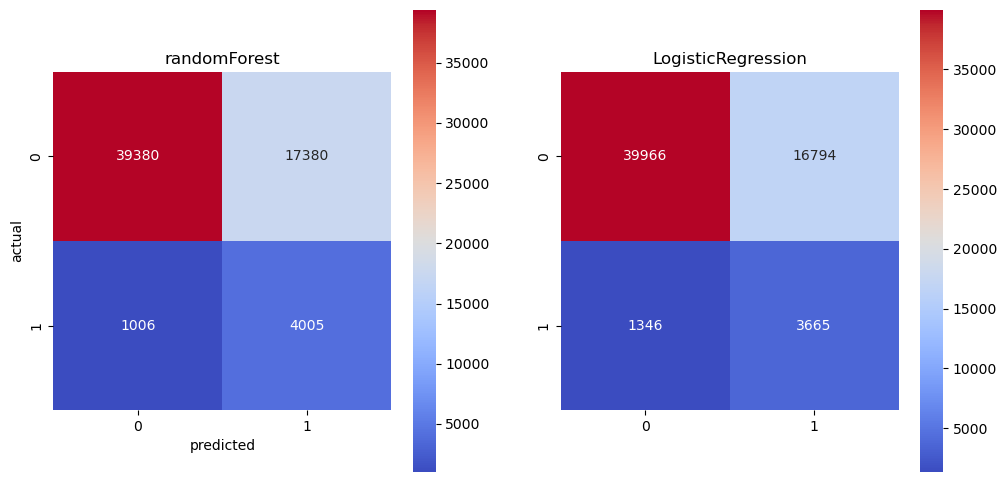

In [121]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(cvd_test_y,pred_rfc),fmt='d',cmap='coolwarm',annot=True).set_title("randomForest")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.gca().set_aspect('equal', adjustable='box') 
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(cvd_test_y,pred_log),fmt='d',cmap='coolwarm',annot=True).set_title("LogisticRegression")
plt.gca().set_aspect('equal', adjustable='box') 

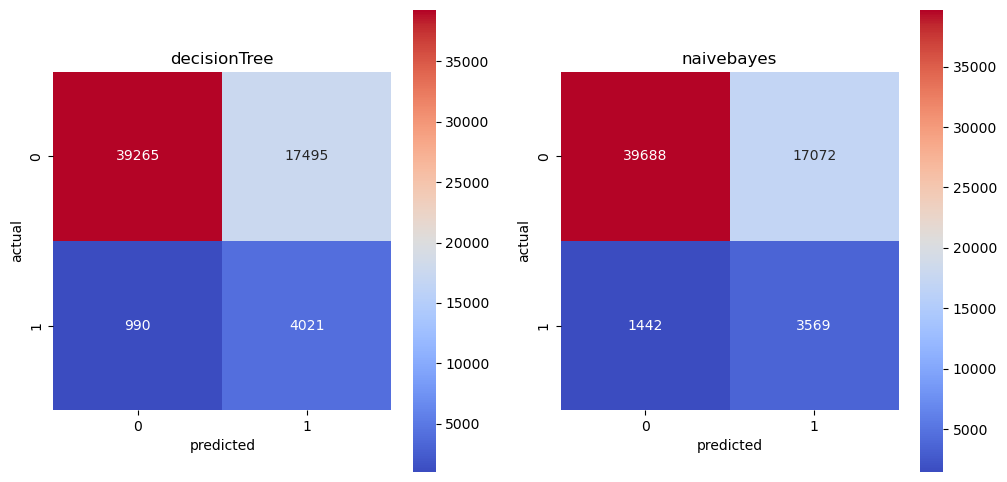

In [122]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(cvd_test_y,dtc_pred),fmt='d',cmap='coolwarm',annot=True).set_title("decisionTree")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.gca().set_aspect('equal', adjustable='box') 
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(cvd_test_y,pred_nb),fmt='d',cmap='coolwarm',annot=True).set_title("naivebayes")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.gca().set_aspect('equal', adjustable='box') 

In [28]:
rfc.feature_importances_

array([0.25438382, 0.01621972, 0.0146781 , 0.00900356, 0.01180035,
       0.00256761, 0.10000231, 0.09603941, 0.04807083, 0.36790486,
       0.00985477, 0.0453021 , 0.0144584 , 0.00278438, 0.00309224,
       0.00383755])

In [29]:
df=pd.DataFrame()


In [30]:
cvd.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')

In [31]:
df['features']=['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption']
df['value']=rfc.feature_importances_
df

,features,value
0,General_Health,0.254384
1,Checkup,0.016220
2,Exercise,0.014678
3,Skin_Cancer,0.009004
4,Other_Cancer,0.011800
5,Depression,0.002568
6,Diabetes,0.100002
7,Arthritis,0.096039
8,Sex,0.048071
9,Age_Category,0.367905


In [56]:
df[df['value']>=0.05].reset_index()

,index,features,value
0,0,General_Health,0.254384
1,6,Diabetes,0.100002
2,7,Arthritis,0.096039
3,9,Age_Category,0.367905


In [34]:
cvd.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')

In [1]:
import tensorflow as tf 

In [2]:
tf.test.gpu_device_name()

''

In [1]:
import pandas as pd

In [37]:
cvd=pd.read_csv(r"C:\Users\Anjaney Deshpande\Desktop\hjghjghjghjghjghjhjghj\CVD.csv")

In [23]:
cvd.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [38]:
cvd=cvd.drop(['Height_(cm)','Weight_(kg)'],axis=1)

In [18]:
    cvd_x=cvd.iloc[::,cvd.columns!='Heart_Disease']
    cvd_x.columns
    cvd_y=cvd.iloc[:,3]

In [32]:
p_values=[]
for i in cvd_x.columns:
    a=pd.crosstab(cvd[i],cvd_y)
    p=chi2_contingency(a)[1]
    p_values.append(p)
p_values



[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.70775202680712e-73,
 0.0,
 0.0,
 0.0,
 0.0,
 1.4178696712409009e-148,
 0.0,
 0.0,
 2.571515888115319e-54,
 2.159617726977898e-51,
 1.5257063846852023e-59]

In [33]:
df1 = pd.DataFrame()
df1['cols'] = cvd_x.columns
df1['values'] = p_values
df1

,cols,values
0,General_Health,0.000000e+00
1,Checkup,0.000000e+00
2,Exercise,0.000000e+00
3,Skin_Cancer,0.000000e+00
4,Other_Cancer,0.000000e+00
5,Depression,5.707752e-73
6,Diabetes,0.000000e+00
7,Arthritis,0.000000e+00
8,Sex,0.000000e+00
9,Age_Category,0.000000e+00


# Therefore, based on the extremely small p-values we get , 
# we can conclude that all the variables in our  dataset are statistically significant according to the chi-square test. 
# This suggests that there are significant associations between each of these variables and 
# whatever they are being tested against.

In [39]:
cvd=cvd.drop(cvd[(cvd['Alcohol_Consumption'] <0) | (cvd['Alcohol_Consumption'] >30)].index)
cvd=cvd.drop(cvd[(cvd['Fruit_Consumption'] <0) | (cvd['Alcohol_Consumption'] >120)].index)
cvd=cvd.drop(cvd[(cvd['Green_Vegetables_Consumption'] <0) | (cvd['Green_Vegetables_Consumption'] >128)].index)
cvd=cvd.drop(cvd[(cvd['FriedPotato_Consumption'] <0) | (cvd['FriedPotato_Consumption'] >128)].index)

In [40]:
cvd.Sex.replace({'Female':0,'Male':1},inplace=True)
cvd.General_Health.replace({'Poor':5,'Very Good':2,'Good':3,'Fair':4,'Excellent':1},inplace=True)
cvd['Checkup'].replace({'Within the past 2 years': 0,'Within the past year': 1,
                            '5 or more years ago': 2,'Within the past 5 years': 3, 'Never': 4}, inplace=True)
cvd.Exercise.replace({'No':0,'Yes':1},inplace=True)
cvd.Heart_Disease.replace({'No':0,'Yes':1},inplace=True)
cvd['Skin_Cancer'].replace({'No':0,'Yes':1},inplace=True)
cvd.Other_Cancer.replace({'No':0,'Yes':1},inplace=True)
cvd.Depression.replace({'No':0,'Yes':1},inplace=True)
cvd['Diabetes'].replace({'No': 0,'Yes': 1,
    'No, pre-diabetes or borderline diabetes': 2,'Yes, but female told only during pregnancy': 3}, inplace=True)
cvd['Age_Category'].replace({
    '70-74': 0,'60-64': 1,'75-79': 2,'80+': 3,
        '65-69': 4,'50-54': 5, '45-49': 6,'18-24': 7,'30-34': 8, 
    '55-59': 9,'35-39': 10,'40-44': 11,'25-29': 12}, inplace=True)
cvd.Arthritis.replace({'Yes':1,'No':0},inplace=True)
cvd.Smoking_History.replace({'Yes':1,'No':0},inplace=True)


In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cvd[cvd.select_dtypes(include='object').columns]=cvd[cvd.select_dtypes(include='object').columns].apply(le.fit_transform)

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = cvd.iloc[::,cvd.columns!='Heart_Disease']
n = SelectKBest(score_func=f_classif, k=10)
num_cols_selected = n.fit_transform(numerical_columns,cvd['Heart_Disease'])
selected_feature_indices = n.get_support(indices=True)
selected_numerical_features = numerical_columns.columns[selected_feature_indices]


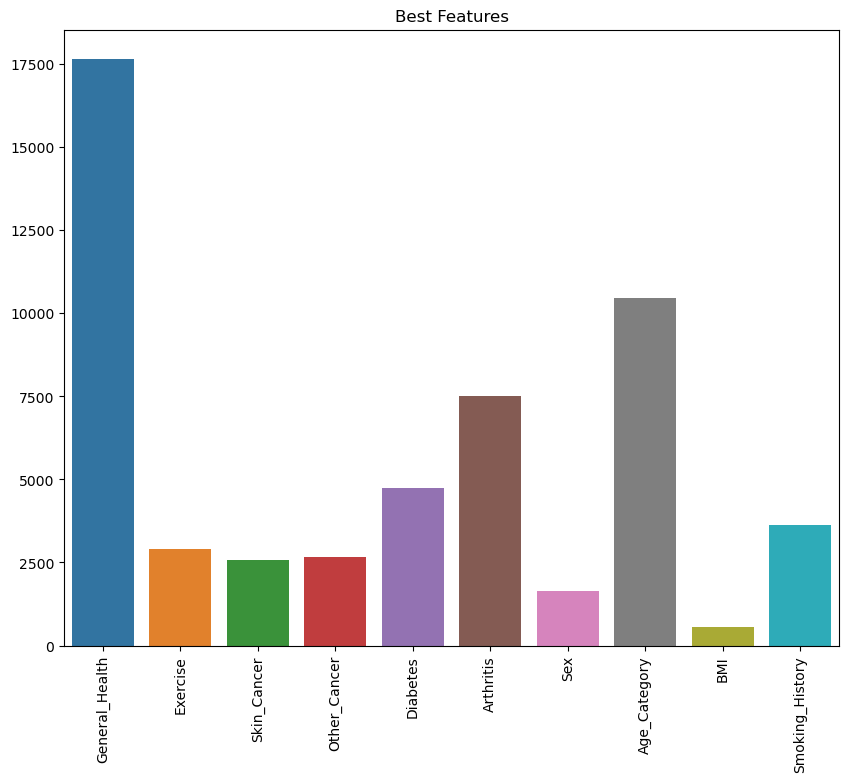

In [29]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=selected_numerical_features, y=n.scores_[selected_feature_indices])
plt.title('Best Features')
plt.xticks(rotation=90);

In [30]:
selected_numerical_features

Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Diabetes',
       'Arthritis', 'Sex', 'Age_Category', 'BMI', 'Smoking_History'],
      dtype='object')

In [31]:
all_cols=list(cvd.columns)
imp_cols=list(selected_numerical_features)
l3=[i for i in all_cols if i not in imp_cols]
l3

['Checkup',
 'Heart_Disease',
 'Depression',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption']

In [42]:
cvd=cvd.drop(['Checkup',
 'Depression',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption'],axis=1)

In [45]:
from sklearn.model_selection import train_test_split
cvd_train,cvd_test=train_test_split(cvd,test_size=0.2)

In [46]:
cvd_train_x = cvd_train.drop(columns=['Heart_Disease'],axis=1)
cvd_train_y = cvd_train['Heart_Disease']
cvd_test_x = cvd_test.drop(columns=['Heart_Disease'],axis=1)
cvd_test_y = cvd_test['Heart_Disease']

In [72]:
cvd_train_x_resampled.columns

Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Diabetes',
       'Arthritis', 'Sex', 'Age_Category', 'BMI', 'Smoking_History'],
      dtype='object')

In [48]:
from imblearn.over_sampling import SMOTE    
smote = SMOTE(sampling_strategy='auto', random_state=42)
cvd_train_x_resampled, cvd_train_y_resampled = smote.fit_resample(cvd_train_x, cvd_train_y)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

## Tuning hyperparameters after anova

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import timeit
search_dict = {
    'n_estimators': randint(50, 150),
    'criterion': ['gini','entropy'],
    'max_depth': randint(4, 9),
    'min_samples_split': randint(50, 100)
}
start = timeit.default_timer()
rfc = RandomForestClassifier()
random_search = RandomizedSearchCV(rfc, param_distributions=search_dict, n_iter=10, cv=5)
random_search.fit(cvd_train_x_resampled,cvd_train_y_resampled)
stop = timeit.default_timer()
print("Best Hyperparameters:",random_search.best_params_)
exc_time = (stop - start)//60
print(f"Execution Time: is --->>>{exc_time} minutes")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 81, 'n_estimators': 118}
Execution Time: is --->>>15.0 minutes


In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini',max_depth=8,min_samples_split=81,n_estimators=118)

In [59]:
rfc.fit(cvd_train_x_resampled,cvd_train_y_resampled)

RandomForestClassifier(max_depth=8, min_samples_split=81, n_estimators=118)

In [61]:
pred_rfc_anova=rfc.predict(cvd_test_x)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report


In [63]:
confusion_matrix(cvd_test_y,pred_rfc_anova)

array([[39299, 17440],
       [ 1003,  4029]], dtype=int64)

In [64]:
cr=classification_report(cvd_test_y,pred_rfc_anova)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     56739
           1       0.19      0.80      0.30      5032

    accuracy                           0.70     61771
   macro avg       0.58      0.75      0.56     61771
weighted avg       0.91      0.70      0.77     61771



In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import timeit
search_dict_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(4, 9),
    'min_samples_split': randint(50, 100)
}
start = timeit.default_timer()
dtc = DecisionTreeClassifier()
random_search_dt = RandomizedSearchCV(dtc, param_distributions=search_dict_dt, n_iter=10, cv=5)
random_search_dt.fit(cvd_train_x_resampled, cvd_train_y_resampled)
stop = timeit.default_timer()
print("Best Hyperparameters:", random_search_dt.best_params_)
exc_time = (stop - start) // 60  
print(f"Execution Time: is --->>>{exc_time} minutes")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 87}
Execution Time: is --->>>0.0 minutes


In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=87)

In [67]:
dtc.fit(cvd_train_x_resampled,cvd_train_y_resampled)

DecisionTreeClassifier(max_depth=8, min_samples_split=87)

In [68]:
pred_dtc=dtc.predict(cvd_test_x)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report


In [70]:
confusion_matrix(cvd_test_y,pred_dtc)

array([[39499, 17240],
       [ 1076,  3956]], dtype=int64)

In [71]:
print(classification_report(cvd_test_y,pred_dtc))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     56739
           1       0.19      0.79      0.30      5032

    accuracy                           0.70     61771
   macro avg       0.58      0.74      0.56     61771
weighted avg       0.91      0.70      0.77     61771



In [127]:
predicted_rfc=rfc.predict_proba(cvd_test_x)[:, 1]

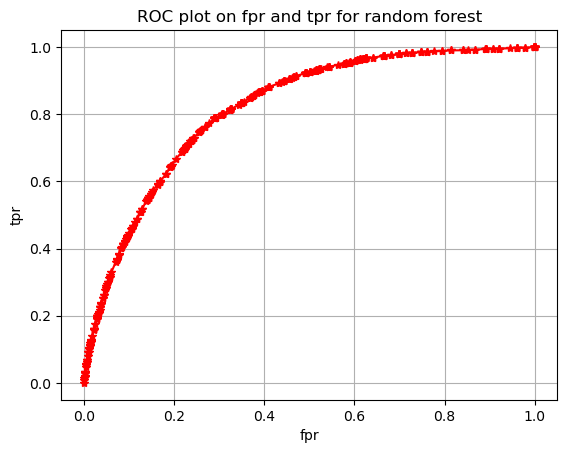

In [128]:
fpr,tpr,threshold=roc_curve(cvd_test_y,predicted_rfc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,marker='*',color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC plot on fpr and tpr for random forest');
plt.grid()

In [129]:
roc_auc_score(cvd_test_y,predicted_rfc)

0.8183497099193614

In [73]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [74]:
log.fit(cvd_train_x_resampled,cvd_train_y_resampled)

LogisticRegression()

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
pred_log = log.predict(cvd_test_x)

In [78]:
confusion_matrix(cvd_test_y,pred_log)

array([[39972, 16767],
       [ 1236,  3796]], dtype=int64)

In [79]:
print(classification_report(cvd_test_y,pred_log))

              precision    recall  f1-score   support

           0       0.97      0.70      0.82     56739
           1       0.18      0.75      0.30      5032

    accuracy                           0.71     61771
   macro avg       0.58      0.73      0.56     61771
weighted avg       0.91      0.71      0.77     61771



In [123]:
pred_probabilities = log.predict_proba(cvd_test_x)[:, 1]

In [124]:
from sklearn.metrics import roc_auc_score, roc_curve

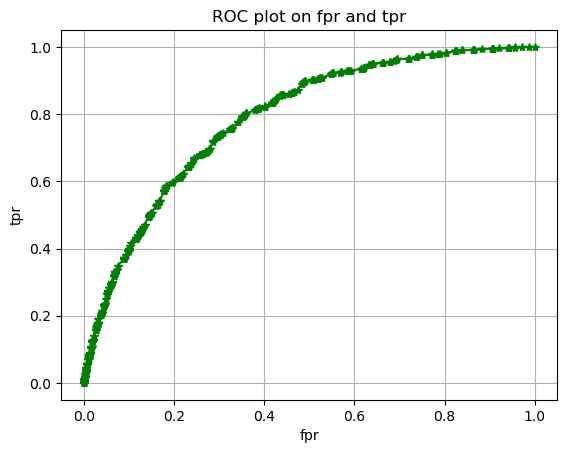

In [125]:
fpr,tpr,threshold=roc_curve(cvd_test_y,pred_probabilities)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,marker='*',color='green')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC plot on fpr and tpr');
plt.grid()


In [126]:
roc_auc_score(cvd_test_y,pred_probabilities)

0.7882542602890975

In [80]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()

In [81]:
gn.fit(cvd_train_x_resampled,cvd_train_y_resampled)

GaussianNB()

In [82]:
gn_pred=gn.predict(cvd_test_x)

In [83]:
confusion_matrix(cvd_test_y,gn_pred)

array([[39782, 16957],
       [ 1298,  3734]], dtype=int64)

In [85]:
print(classification_report(cvd_test_y,gn_pred))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     56739
           1       0.18      0.74      0.29      5032

    accuracy                           0.70     61771
   macro avg       0.57      0.72      0.55     61771
weighted avg       0.90      0.70      0.77     61771



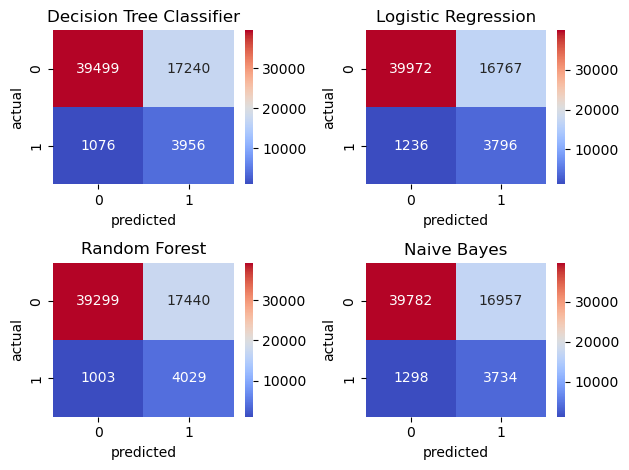

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.subplot(2, 2, 1)
sns.heatmap(confusion_matrix(cvd_test_y,pred_dtc), annot=True, fmt='d', cmap='coolwarm').set_title('Decision Tree Classifier')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.subplot(2, 2, 2)
sns.heatmap(confusion_matrix(cvd_test_y, pred_log), annot=True, fmt='d',cmap='coolwarm').set_title('Logistic Regression')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.subplot(2, 2, 3)
sns.heatmap(confusion_matrix(cvd_test_y,pred_rfc_anova), annot=True, fmt='d',cmap='coolwarm').set_title('Random Forest')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.subplot(2, 2, 4)
sns.heatmap(confusion_matrix(cvd_test_y,gn_pred), annot=True, fmt='d',cmap='coolwarm').set_title('Naive Bayes')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.tight_layout()
plt.show()

## Boruta

In [34]:
cvd=pd.read_csv(r"C:\Users\Anjaney Deshpande\Desktop\hjghjghjghjghjghjhjghj\CVD.csv")
cvd.sample(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
174111,Good,Within the past 2 years,Yes,No,No,No,No,No,No,Female,30-34,157.0,70.76,28.53,No,1.0,30.0,8.0,1.0
127502,Very Good,Within the past 2 years,Yes,No,No,No,Yes,No,No,Female,30-34,165.0,56.70,20.80,Yes,30.0,8.0,12.0,4.0
104364,Fair,Within the past year,No,No,No,No,No,No,No,Male,70-74,188.0,81.65,23.11,No,0.0,30.0,0.0,2.0
156179,Very Good,Within the past year,Yes,No,No,No,Yes,No,No,Female,35-39,180.0,113.40,34.87,No,0.0,30.0,12.0,8.0
175282,Good,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,168.0,79.38,28.25,No,4.0,12.0,4.0,4.0


In [35]:
cvd=cvd.drop(['Height_(cm)','Weight_(kg)'],axis=1)

In [36]:
cvd.describe()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,28.626211,5.096366,29.835200,15.110441,6.296616
std,6.522323,8.199763,24.875735,14.926238,8.582954
min,12.020000,0.000000,0.000000,0.000000,0.000000
25%,24.210000,0.000000,12.000000,4.000000,2.000000
50%,27.440000,1.000000,30.000000,12.000000,4.000000
75%,31.850000,6.000000,30.000000,20.000000,8.000000
max,99.330000,30.000000,120.000000,128.000000,128.000000


In [37]:
cvd=cvd.drop(cvd[(cvd['Alcohol_Consumption'] <0) | (cvd['Alcohol_Consumption'] >30)].index)
cvd=cvd.drop(cvd[(cvd['Fruit_Consumption'] <0) | (cvd['Alcohol_Consumption'] >120)].index)
cvd=cvd.drop(cvd[(cvd['Green_Vegetables_Consumption'] <0) | (cvd['Green_Vegetables_Consumption'] >128)].index)
cvd=cvd.drop(cvd[(cvd['FriedPotato_Consumption'] <0) | (cvd['FriedPotato_Consumption'] >128)].index)

In [38]:
cvd.Sex.replace({'Female':0,'Male':1},inplace=True)
cvd.General_Health.replace({'Poor':5,'Very Good':2,'Good':3,'Fair':4,'Excellent':1},inplace=True)
cvd['Checkup'].replace({'Within the past 2 years': 0,'Within the past year': 1,
                            '5 or more years ago': 2,'Within the past 5 years': 3, 'Never': 4}, inplace=True)
cvd.Exercise.replace({'No':0,'Yes':1},inplace=True)
cvd.Heart_Disease.replace({'No':0,'Yes':1},inplace=True)
cvd['Skin_Cancer'].replace({'No':0,'Yes':1},inplace=True)
cvd.Other_Cancer.replace({'No':0,'Yes':1},inplace=True)
cvd.Depression.replace({'No':0,'Yes':1},inplace=True)
cvd['Diabetes'].replace({'No': 0,'Yes': 1,
    'No, pre-diabetes or borderline diabetes': 2,'Yes, but female told only during pregnancy': 3}, inplace=True)
cvd['Age_Category'].replace({
   '70-74': 0,'60-64': 1,'75-79': 2,'80+': 3,
         '65-69': 4,'50-54': 5, '45-49': 6,'18-24': 7,'30-34': 8, 
    '55-59': 9,'35-39': 10,'40-44': 11,'25-29': 12}, inplace=True)
cvd.Arthritis.replace({'Yes':1,'No':0},inplace=True)
cvd.Smoking_History.replace({'Yes':1,'No':0},inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cvd[cvd.select_dtypes(include='object').columns]=cvd[cvd.select_dtypes(include='object').columns].apply(le.fit_transform)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
cvd_train,cvd_test=train_test_split(cvd,test_size=0.2)


In [43]:
cvd_train_x = cvd_train.drop(columns=['Heart_Disease'],axis=1)
cvd_train_y = cvd_train['Heart_Disease']
cvd_test_x = cvd_test.drop(columns=['Heart_Disease'],axis=1)
cvd_test_y = cvd_test['Heart_Disease']

In [44]:
# before oversampling
cvd_train_y.value_counts()

Heart_Disease
0    227196
1     19887
Name: count, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE    
smote = SMOTE(sampling_strategy='auto', random_state=42)
cvd_train_x_resampled, cvd_train_y_resampled = smote.fit_resample(cvd_train_x, cvd_train_y)

In [46]:
# after oversampling 
cvd_train_y_resampled.value_counts()

Heart_Disease
0    227196
1    227196
Name: count, dtype: int64

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
from boruta import BorutaPy
boruta_feature_selector = BorutaPy(rfc, max_iter=25, n_estimators='auto', verbose=2)
boruta_feature_selector.fit(cvd_train_x_resampled.values, cvd_train_y_resampled.values)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations